In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\ywu09\Downloads\Project 3\sleep_merged.tsv",sep='\t')
df.head()

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0


In [5]:
len(df)
# 87 rows

87

In [7]:
df.describe()

# Min BrainWt 0.0 ???
# Visible Outliers

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,54.000000,54.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,18.757011,144.696322,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,6.125000,36.750000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,28.000000,195.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [8]:
df.isna().sum()
# Many columns with missing values

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

In [9]:
df.Species.value_counts()

# Every species is unique in the data

African elephant             1
Northern fur seal            1
Potto                        1
Potoroo                      1
Pilot whale                  1
                            ..
Genet                        1
Galago                       1
European hedgehog            1
Eastern american mole        1
Western american chipmunk    1
Name: Species, Length: 87, dtype: int64

In [10]:
df.Genus.value_counts()

Spermophilus    3
Panthera        3
Equus           2
Vulpes          2
Canis           2
               ..
Priodontes      1
Genetta         1
Galago          1
Erinaceus       1
Eutamias        1
Name: Genus, Length: 80, dtype: int64

In [11]:
df.Order.value_counts()

Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Scandentia          1
Name: Order, dtype: int64

In [12]:
df.Vore.value_counts()
# The model will have a hard time predicting values for insectivores

herbi      37
carni      22
omni       20
insecti     8
Name: Vore, dtype: int64

In [13]:
df.Conservation.value_counts()
# To keep ? What does it mean ?

lc              30
domesticated    10
vu               7
en               4
nt               4
cd               2
cr               1
Name: Conservation, dtype: int64

<Axes: xlabel='Vore', ylabel='Count'>

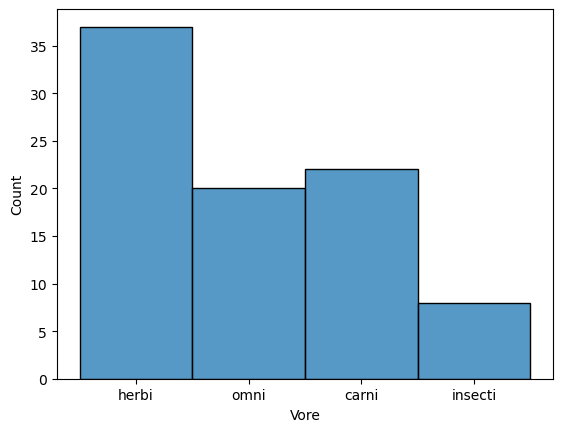

In [14]:
sns.histplot(df,x="Vore")

<Axes: xlabel='BodyWt'>

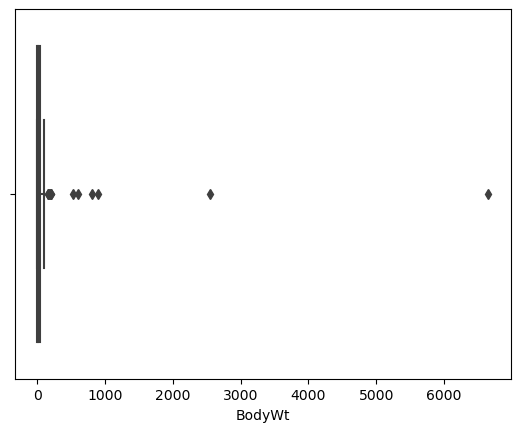

In [15]:
sns.boxplot(df,x="BodyWt")
# Some outliers

<Axes: xlabel='BrainWt'>

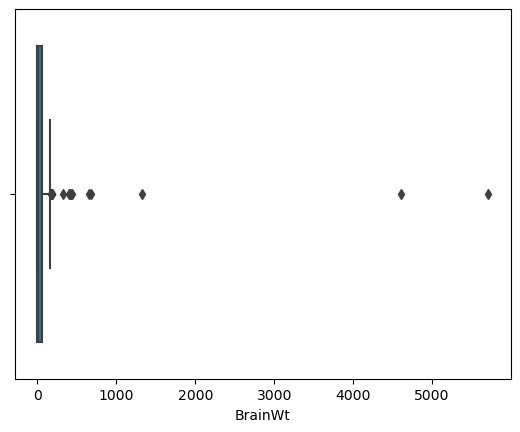

In [16]:
sns.boxplot(df,x="BrainWt")
# Some outliers also
# Are the two of them correlated ?

<Axes: xlabel='BodyWt', ylabel='BrainWt'>

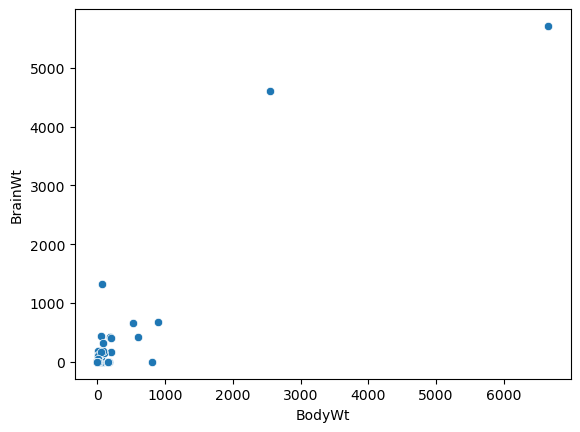

In [17]:
sns.scatterplot(data=df,x="BodyWt",y="BrainWt")
# 2 extreme points. What are them ?

In [18]:
df.loc[df.BodyWt > 1000]
# What about the ratio BodyWt / BrainWt ?

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.0,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
5,Asian elephant,Elephas,Proboscidea,herbi,en,2547.0,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0


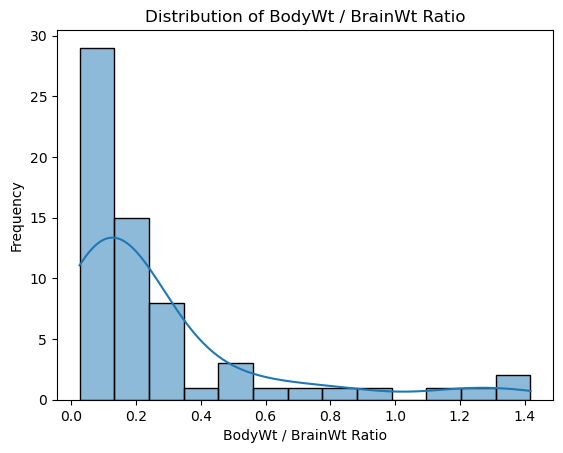

In [19]:
# Assuming df is your DataFrame
df['BodyWt_BrainWt_Ratio'] = df['BodyWt'] / df['BrainWt']

# Create a histogram using Seaborn
sns.histplot(data=df['BodyWt_BrainWt_Ratio'], kde=True)

# Add labels and title
plt.xlabel('BodyWt / BrainWt Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of BodyWt / BrainWt Ratio')

# Show the plot
plt.show()

In [20]:
df.loc[df.BrainWt == 0]

# What will we do with this zeros ?

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,BodyWt_BrainWt_Ratio
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.0,5.2,18.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
10,Caspian seal,Phoca,Carnivora,carni,vu,86.000,0.0,3.5,20.50,NaN,0.4,NaN,NaN,NaN,NaN,NaN,inf
11,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.0,12.1,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.180,0.0,5.6,18.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.0,11.5,12.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
18,Degu,Octodon,Rodentia,herbi,lc,0.210,0.0,7.7,16.30,NaN,0.9,NaN,NaN,NaN,NaN,NaN,inf
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.0,15.8,8.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
45,Lion,Panthera,Carnivora,carni,vu,161.499,0.0,13.5,10.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
50,Mongolian gerbil,Meriones,Rodentia,herbi,lc,0.053,0.0,14.2,9.80,NaN,1.9,NaN,NaN,NaN,NaN,NaN,inf


<Axes: xlabel='Awake', ylabel='Count'>

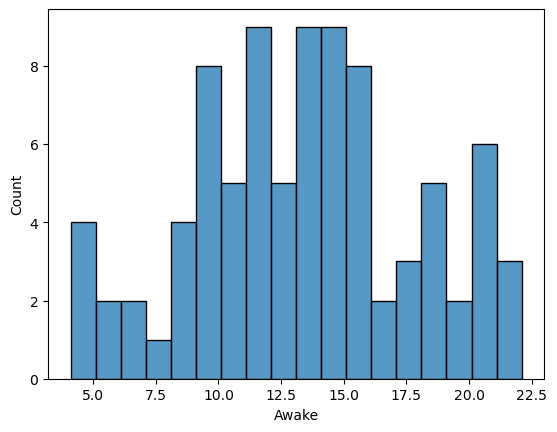

In [21]:
sns.histplot(df,x="Awake",binwidth=1)

<Axes: xlabel='LifeSpan'>

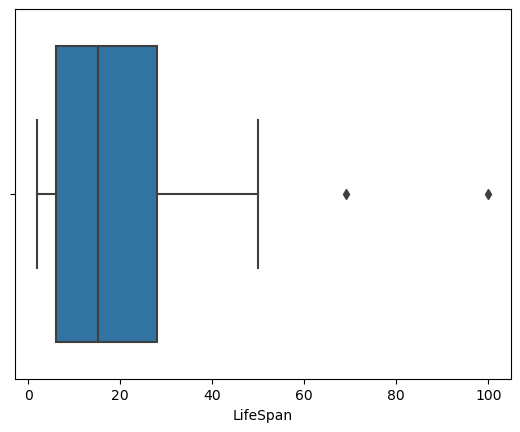

In [22]:
sns.boxplot(df,x="LifeSpan")

In [23]:
df.loc[df.LifeSpan > 60]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,BodyWt_BrainWt_Ratio
5,Asian elephant,Elephas,Proboscidea,herbi,en,2547.0,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0,0.553335
41,Human,Homo,Primates,omni,NaN,62.0,1320.0,8.0,16.0,6.1,1.9,100.0,267.0,1.0,1.0,1.0,0.046970


In [24]:
df.loc[(df.LifeSpan.isna()) | (df.Gestation.isna())]
# 33 missing values
# Same as Gestation with the exception of 3 examples

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,BodyWt_BrainWt_Ratio
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.00,8.7,15.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.70,16.6,7.40,NaN,NaN,NaN,25.0,5.0,2.0,3.0,0.161404
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.00,5.2,18.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
10,Caspian seal,Phoca,Carnivora,carni,vu,86.000,0.00,3.5,20.50,NaN,0.4,NaN,NaN,NaN,NaN,NaN,inf
11,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.00,12.1,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.180,0.00,5.6,18.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
15,Cotton rat,Sigmodon,Rodentia,herbi,NaN,0.148,1.18,11.3,12.70,NaN,1.1,NaN,NaN,NaN,NaN,NaN,0.125424
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.00,11.5,12.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
18,Degu,Octodon,Rodentia,herbi,lc,0.210,0.00,7.7,16.30,NaN,0.9,NaN,NaN,NaN,NaN,NaN,inf
19,Desert hedgehog,Paraechinus,Erinaceomorpha,insecti,lc,0.550,2.40,10.3,13.70,7.6,2.7,NaN,NaN,2.0,1.0,2.0,0.229167


<Axes: xlabel='Gestation', ylabel='Count'>

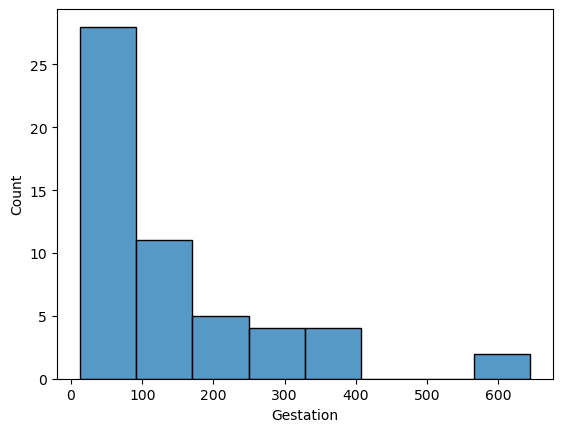

In [25]:
sns.histplot(df,x="Gestation")

In [26]:
df.Predation.value_counts()

1.0    14
2.0    14
5.0    13
3.0    10
4.0     7
Name: Predation, dtype: int64

In [27]:
df.Exposure.value_counts()

1.0    26
2.0    12
5.0    11
4.0     5
3.0     4
Name: Exposure, dtype: int64

In [28]:
df.Danger.value_counts()

1.0    18
2.0    13
3.0    10
4.0     9
5.0     8
Name: Danger, dtype: int64

In [29]:
df.loc[df.Danger.isna()]

# Same missing values as Predation and Exposure

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,BodyWt_BrainWt_Ratio
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.00,8.7,15.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.00,5.2,18.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
10,Caspian seal,Phoca,Carnivora,carni,vu,86.000,0.00,3.5,20.50,NaN,0.4,NaN,NaN,NaN,NaN,NaN,inf
11,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.00,12.1,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.180,0.00,5.6,18.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
15,Cotton rat,Sigmodon,Rodentia,herbi,NaN,0.148,1.18,11.3,12.70,NaN,1.1,NaN,NaN,NaN,NaN,NaN,0.125424
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.00,11.5,12.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
18,Degu,Octodon,Rodentia,herbi,lc,0.210,0.00,7.7,16.30,NaN,0.9,NaN,NaN,NaN,NaN,NaN,inf
20,Dog,Canis,Carnivora,carni,domesticated,14.000,70.00,10.1,13.90,NaN,2.9,NaN,NaN,NaN,NaN,NaN,0.200000
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.00,15.8,8.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


<Axes: xlabel='Danger', ylabel='Count'>

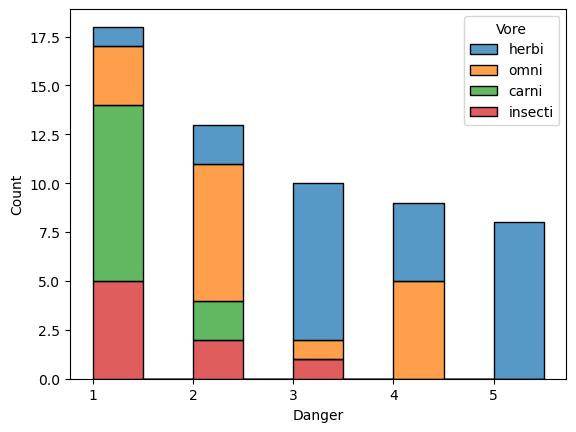

In [30]:
sns.histplot(data=df, x="Danger", hue="Vore", multiple="stack",binrange=(1,5.5),binwidth=0.5)

<Axes: xlabel='Exposure', ylabel='Count'>

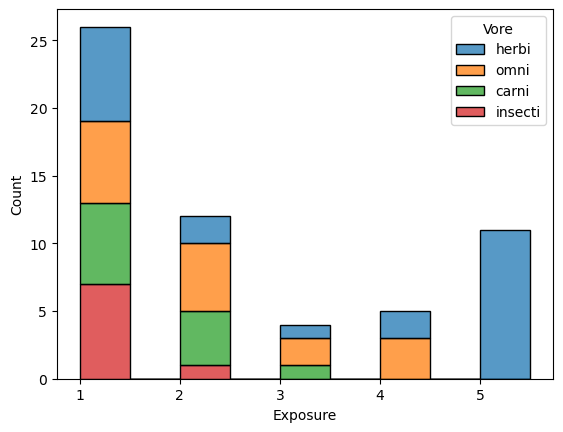

In [31]:
sns.histplot(data=df, x="Exposure", hue="Vore", multiple="stack",binrange=(1,5.5),binwidth=0.5)

<Axes: xlabel='Predation', ylabel='Count'>

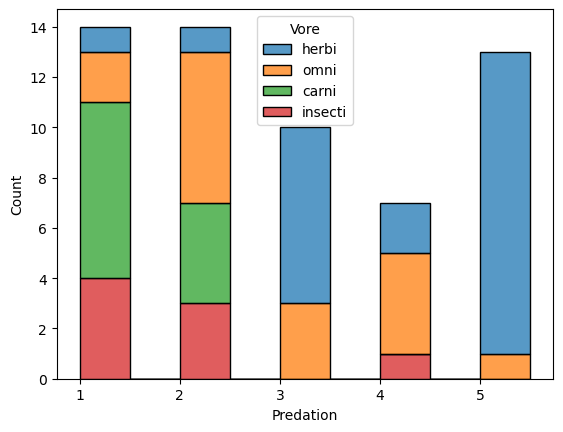

In [32]:
sns.histplot(data=df, x="Predation", hue="Vore", multiple="stack",binrange=(1,5.5),binwidth=0.5)

In [33]:
df.columns

Index(['Species', 'Genus', 'Order', 'Vore', 'Conservation', 'BodyWt',
       'BrainWt', 'TotalSleep', 'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger', 'BodyWt_BrainWt_Ratio'],
      dtype='object')

C:\Users\ywu09\AppData\Local\Temp\ipykernel_48552\3366514485.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(subset_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)


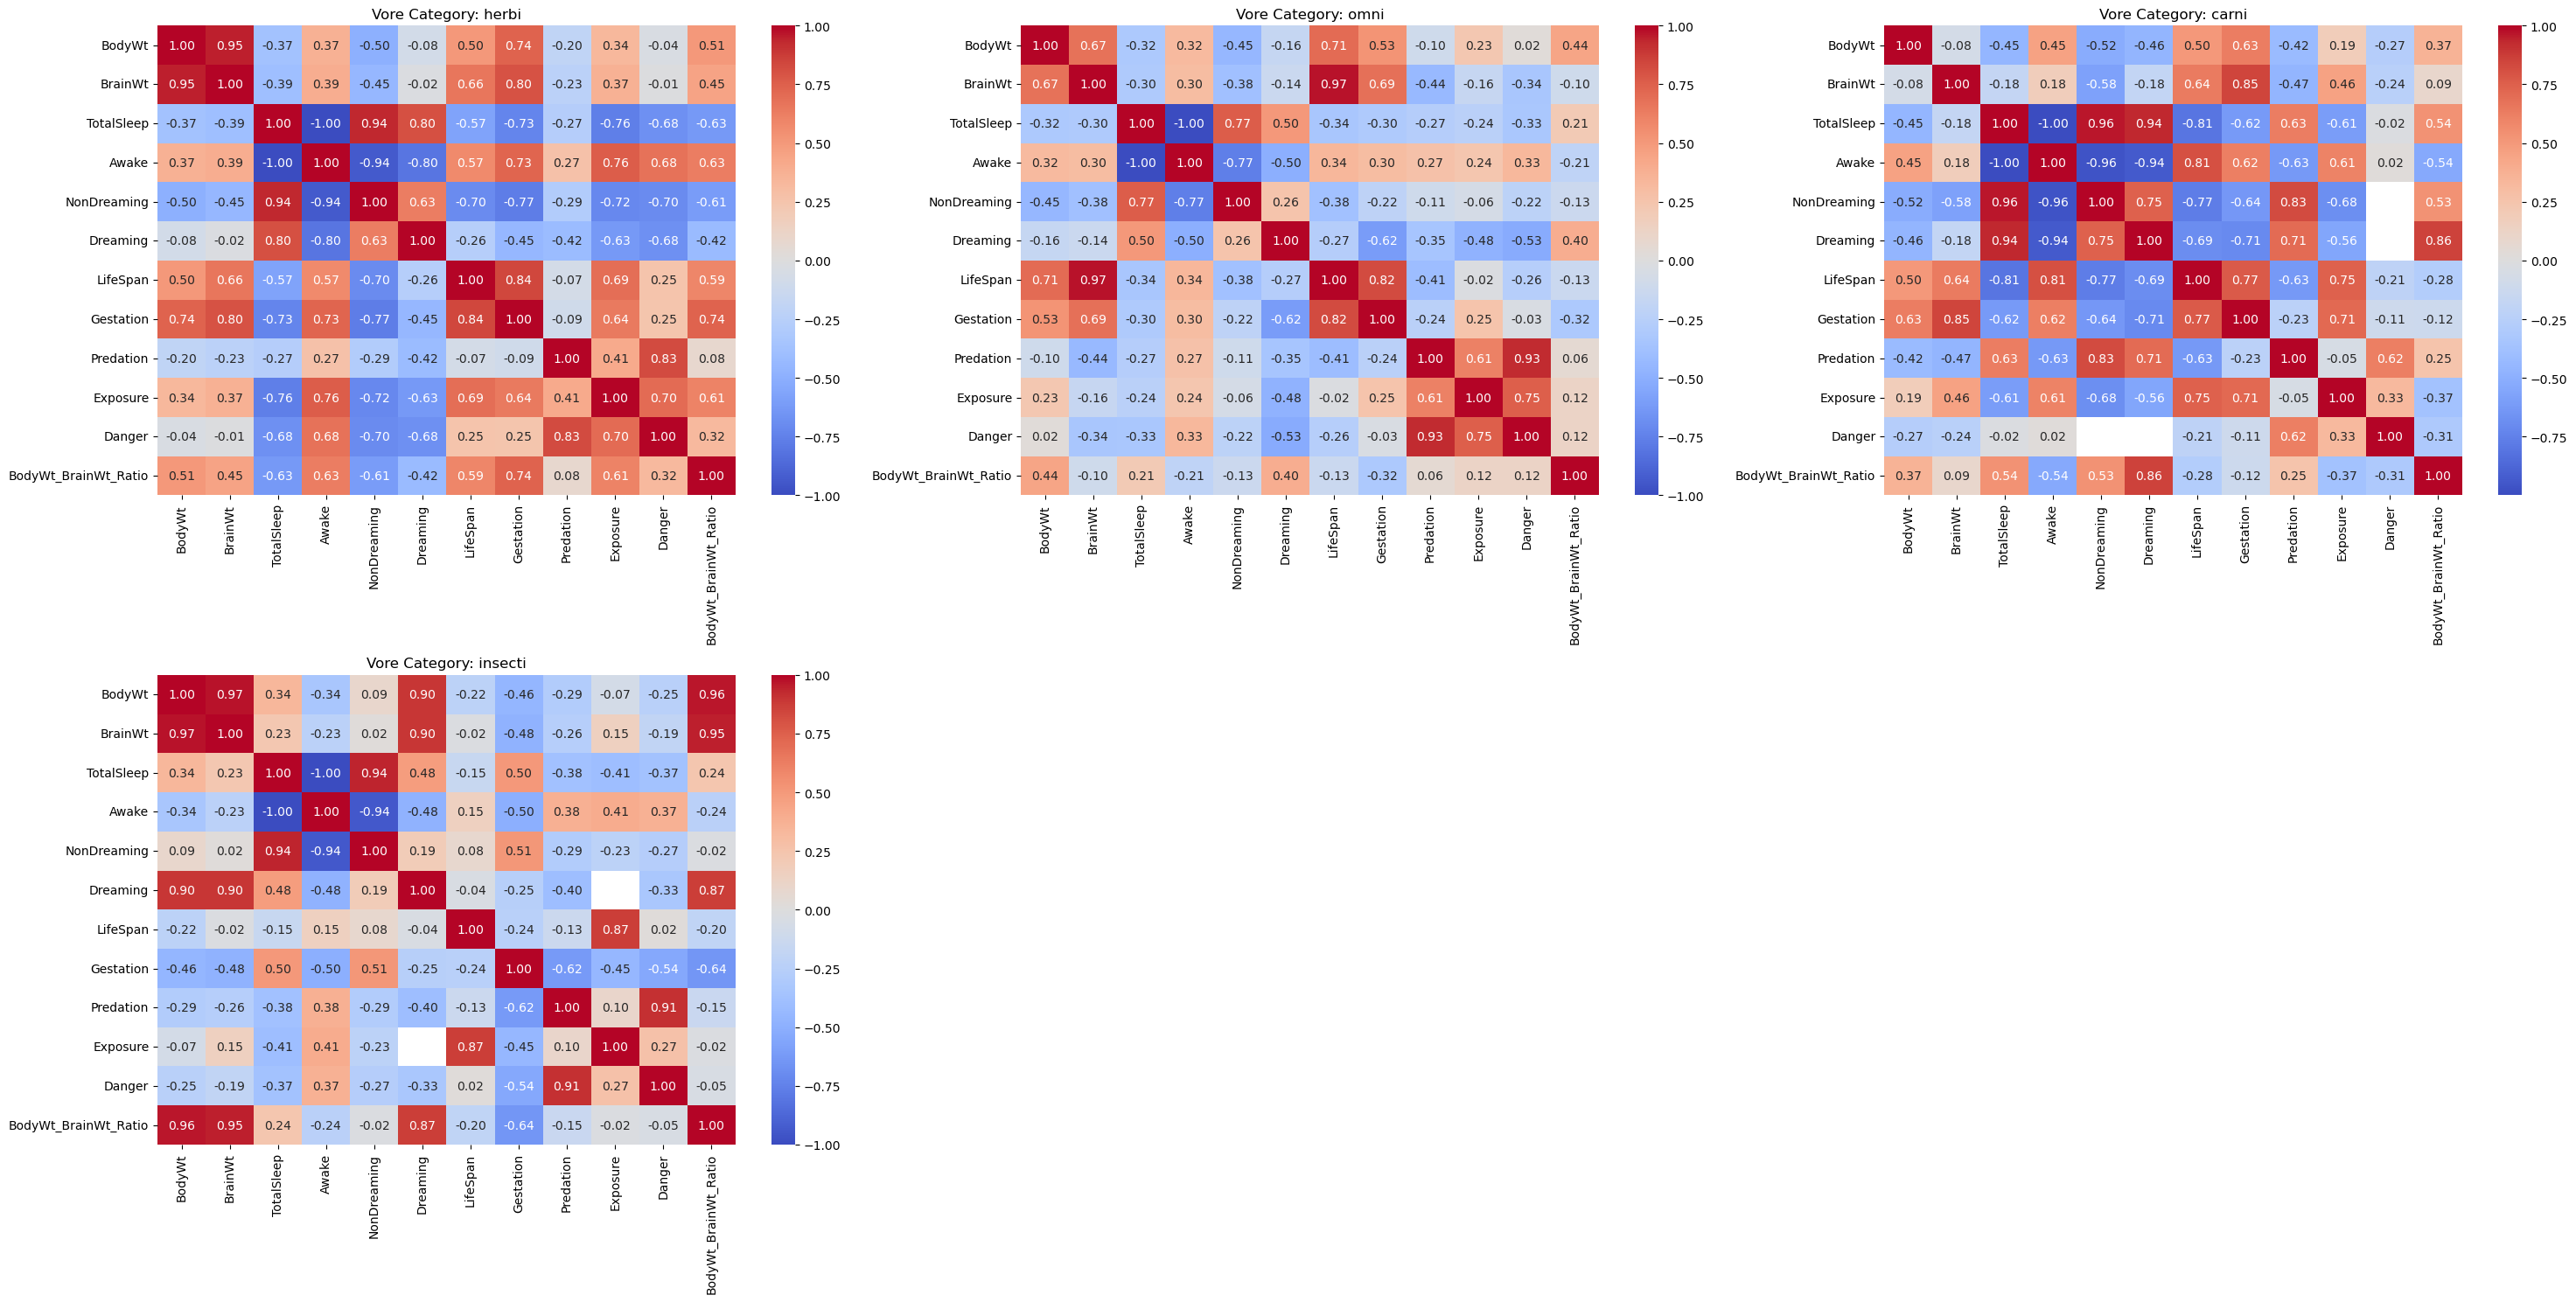

In [34]:

# Get unique values in the 'Vore' column
unique_vores = df['Vore'].unique()

# Set up the number of rows and columns for the subplots
num_rows = (len(unique_vores) // 3) + (len(unique_vores) % 3)
num_cols = min(3, len(unique_vores))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 15))

# Flatten the axes if necessary
axes = axes.flatten()

# Iterate over unique values in 'Vore' and create heatmaps
for i, vore_category in enumerate(unique_vores):
    ax = axes[i]
    subset_df = df[df['Vore'] == vore_category]
    sns.heatmap(subset_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
    ax.set_title(f'Vore Category: {vore_category}')

# Remove empty subplots
for i in range(len(unique_vores), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()

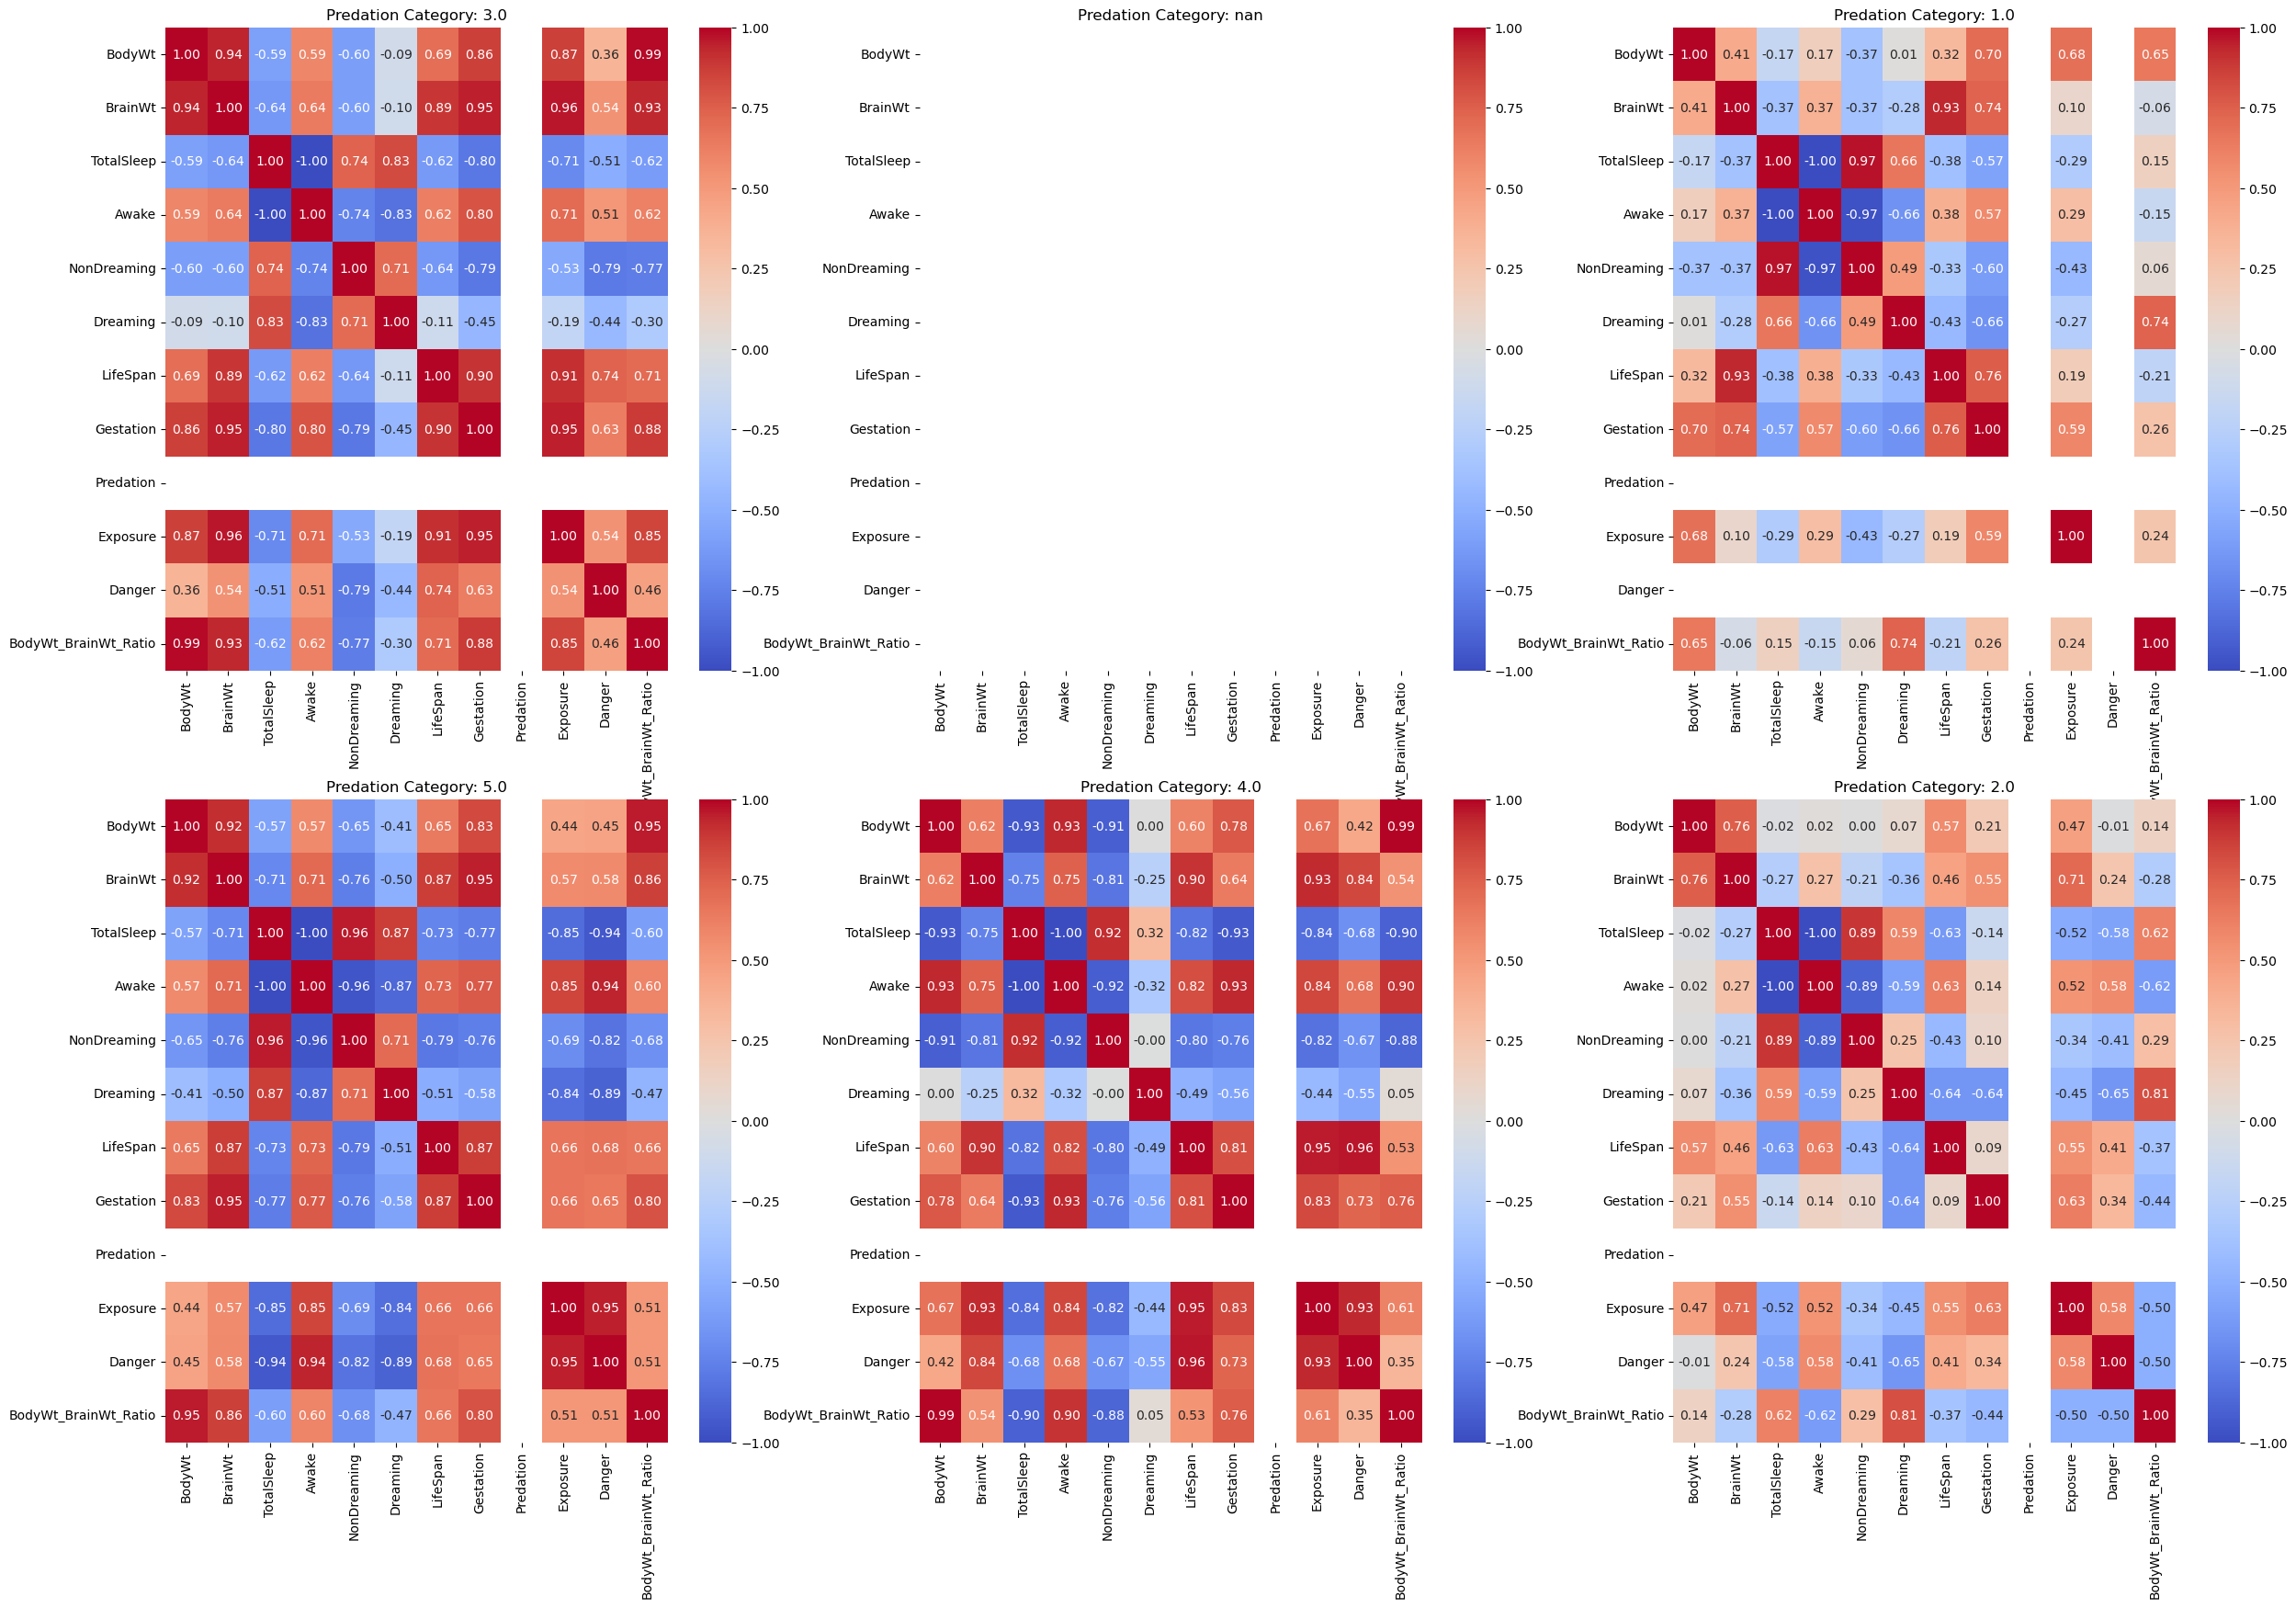

In [45]:
# Get unique values in the 'Predation' column
unique_predations = df['Predation'].unique()
 
# Set up the number of rows and columns for the subplots keep or not ?
# num_rows = (len(unique_predations) // 3) + (len(unique_predations) % 3)
# num_cols = min(3, len(unique_predations)) 

# Adjust the size of the entire figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10 * num_rows))

# Flatten the axes if necessary
axes = axes.flatten()

# Define vmin and vmax for the color scale
vmin, vmax = -1, 1  # Adjust these values based on your data

for i, predation_category in enumerate(unique_predations):
    ax = axes[i]
    subset_df = df[df['Predation'] == predation_category]
    
    # Explicitly set numeric_only to True to address the FutureWarning
    correlation_matrix = subset_df.corr(numeric_only=True)
    
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, vmin=vmin, vmax=vmax)
    ax.set_title(f'Predation Category: {predation_category}')

<Axes: >

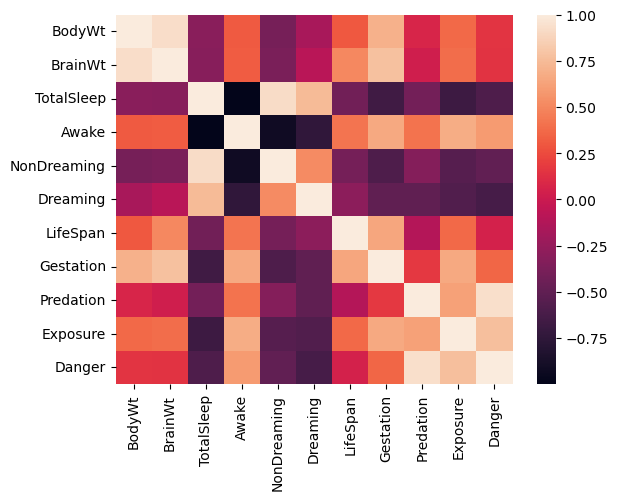

In [6]:
sns.heatmap(df[["BodyWt","BrainWt","TotalSleep",'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger']].corr())

In [42]:
df[["BodyWt","BrainWt","TotalSleep",'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger']].corr()
# Unexpected correlations between
# BrainWt and Gestation
# Awake and Exposure
# Dreaming and Danger
# Gestation and Exposure....

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
BodyWt,1.000000,0.925683,-0.310147,0.310119,-0.390767,-0.166742,0.302382,0.696004,0.070922,0.370613,0.150341
BrainWt,0.925683,1.000000,-0.319661,0.319476,-0.376848,-0.093491,0.506326,0.776817,0.027343,0.383869,0.143061
TotalSleep,-0.310147,-0.319661,1.000000,-0.999999,0.915648,0.749131,-0.417433,-0.660791,-0.408713,-0.677876,-0.587729
Awake,0.310119,0.319476,-0.999999,1.000000,-0.915648,-0.749136,0.417433,0.660791,0.408713,0.677876,0.587729
NonDreaming,-0.390767,-0.376848,0.915648,-0.915648,1.000000,0.517966,-0.400311,-0.588502,-0.332149,-0.550287,-0.495562
Dreaming,-0.166742,-0.093491,0.749131,-0.749136,0.517966,1.000000,-0.292212,-0.500477,-0.500967,-0.571760,-0.628060
LifeSpan,0.302382,0.506326,-0.417433,0.417433,-0.400311,-0.292212,1.000000,0.643651,-0.116818,0.372426,0.049262
Gestation,0.696004,0.776817,-0.660791,0.660791,-0.588502,-0.500477,0.643651,1.000000,0.169895,0.659636,0.356378
Predation,0.070922,0.027343,-0.408713,0.408713,-0.332149,-0.500967,-0.116818,0.169895,1.000000,0.619839,0.930782
Exposure,0.370613,0.383869,-0.677876,0.677876,-0.550287,-0.571760,0.372426,0.659636,0.619839,1.000000,0.770361


KeyError: 'vore'

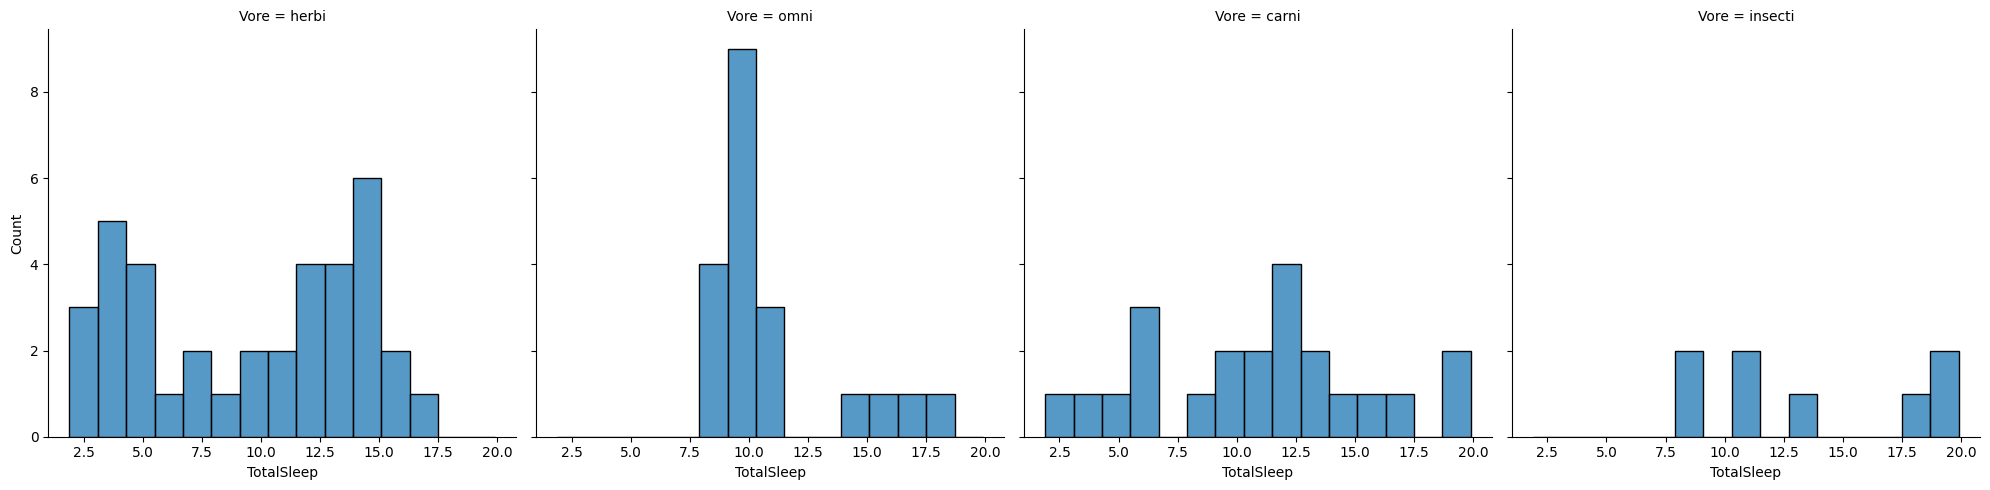

In [56]:
sns.displot(df,x="TotalSleep",col="Vore",bins=15)

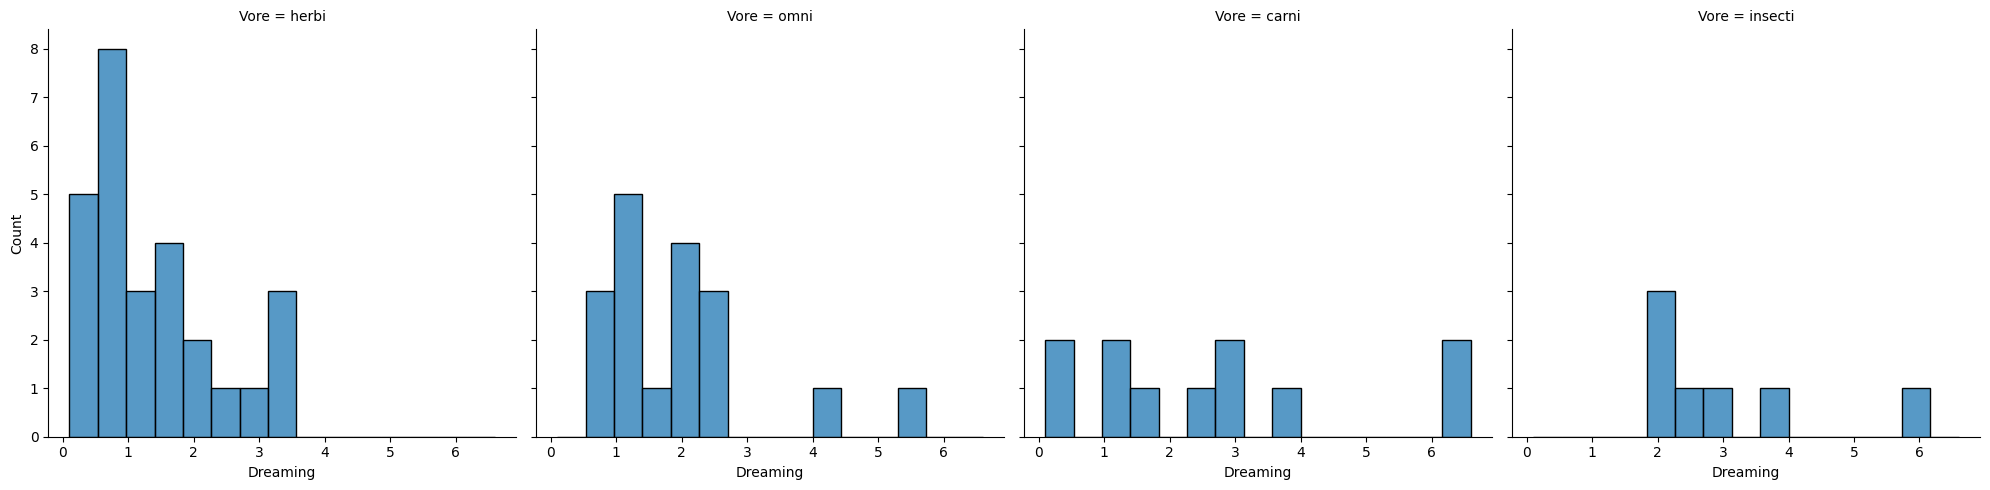

In [57]:
sns.displot(df,x="Dreaming",col="Vore",bins=15)

<Axes: xlabel='TotalSleep', ylabel='Dreaming'>

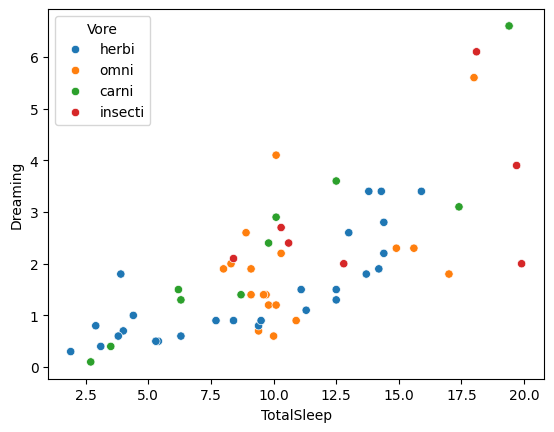

In [59]:
sns.scatterplot(df,x="TotalSleep",y="Dreaming",hue="Vore")

<Axes: xlabel='TotalSleep', ylabel='Exposure'>

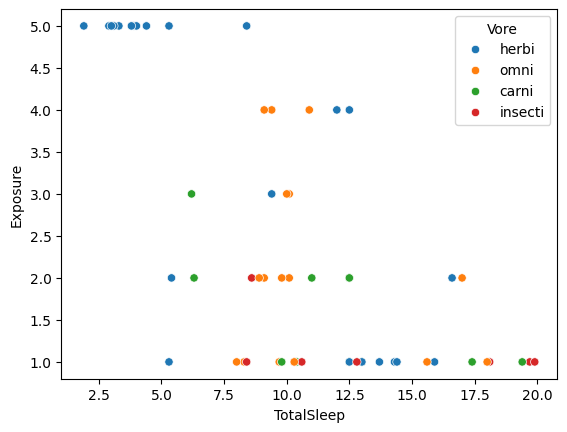

In [65]:
sns.scatterplot(df,x="TotalSleep",y="Exposure",hue="Vore")

<Axes: xlabel='TotalSleep', ylabel='Gestation'>

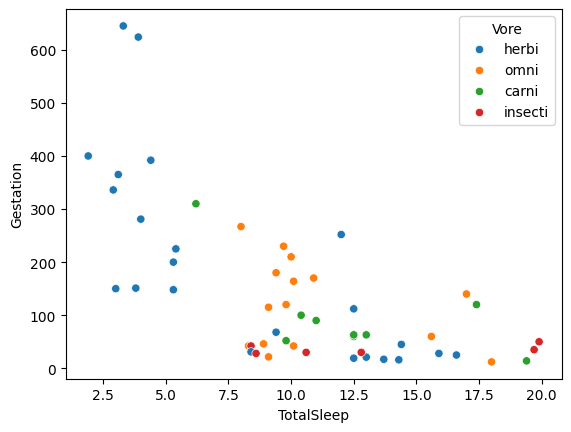

In [64]:
sns.scatterplot(df,x="TotalSleep",y="Gestation",hue="Vore")

In [43]:
fullday =  df.Awake + df.TotalSleep
fullday.value_counts()
# 2 strange values

24.00    85
24.05     1
24.05     1
Name: count, dtype: int64

In [44]:
df.loc[df.NonDreaming.isna(),["TotalSleep","NonDreaming","Dreaming"]]

,TotalSleep,NonDreaming,Dreaming
0,3.3,NaN,NaN
2,8.7,NaN,NaN
3,12.5,NaN,NaN
4,16.6,NaN,NaN
8,5.2,NaN,NaN
10,3.5,NaN,0.4
11,12.1,NaN,NaN
14,5.6,NaN,NaN
15,11.3,NaN,1.1
17,11.5,NaN,NaN


In [45]:
df_mod = df.copy()

In [46]:
df_mod["SleepComputed"] = df_mod.NonDreaming + df_mod.Dreaming
df_mod.loc[df_mod.NonDreaming > 0,["TotalSleep","SleepComputed","NonDreaming","Dreaming"]]
# Discrepancy in the data TotalSleep <> Dreaming + NonDreaming (SleepComputed)

,TotalSleep,SleepComputed,NonDreaming,Dreaming
1,8.3,8.3,6.3,2.0
5,3.9,3.9,2.1,1.8
6,9.4,9.8,9.1,0.7
7,19.7,19.7,15.8,3.9
9,4.4,6.2,5.2,1.0
12,9.7,9.7,8.3,1.4
13,12.5,12.5,11.0,1.5
16,4.0,3.9,3.2,0.7
19,10.3,10.3,7.6,2.7
21,12.5,14.5,10.9,3.6


In [47]:
NonDreamingtoFill = df_mod.loc[(df_mod.NonDreaming.isna()) & (df_mod.Dreaming > 0),["TotalSleep","NonDreaming","Dreaming"]]
NonDreamingtoFill

,TotalSleep,NonDreaming,Dreaming
10,3.5,NaN,0.4
15,11.3,NaN,1.1
18,7.7,NaN,0.9
20,10.1,NaN,2.9
22,3.1,NaN,0.4
29,1.9,NaN,0.3
34,6.3,NaN,0.6
37,14.9,NaN,2.3
50,14.2,NaN,1.9
51,9.5,NaN,0.9


In [48]:
NonDreamingFilled = NonDreamingtoFill.TotalSleep - NonDreamingtoFill.Dreaming
NonDreamingFilled

10     3.1
15    10.2
18     6.8
20     7.2
22     2.7
29     1.6
34     5.7
37    12.6
50    12.3
51     8.6
55     7.3
61     2.6
62     9.6
73     8.2
76    12.8
77    10.4
78    12.2
dtype: float64

In [31]:
df_mod.isna().sum()

NameError: name 'df_mod' is not defined

In [ ]:
df_mod.loc[(df_mod.Dreaming.isna()) & (df_mod.NonDreaming > 0),["TotalSleep","NonDreaming","Dreaming"]]

In [ ]:
df_mod.loc[(df_mod.Dreaming.isna()) & (df_mod.NonDreaming > 0),"Dreaming"] = 0
df_mod.isna().sum()

In [ ]:
df_mod.loc[df_mod.Dreaming.isna()]